In [25]:
#Склеить изображение (5 х 5)
#Убрать градиенты по краям
#Убрать линии склейки
#Выделить контуры животных
#Найти контур одного и того же животного на всех изображениях
#Отследить изменение площади
#Можно показать, какие части контурв растягиваются / сжимаются
#Отследить перемещение
!pip install opencv-python

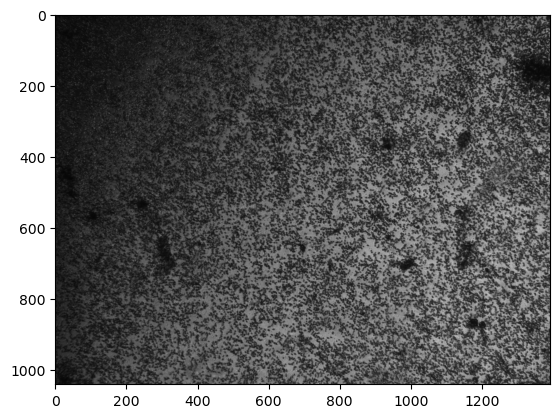

In [24]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

img = cv.imread("./data/Well B1_01/2020_02_21_19_01_45_57.tif")
#blurred = cv.blur(255 - img, (5, 5))
#img = cv.addWeighted(255 - img, 1.5, blurred, -0.5, 0);
plt.imshow(img)

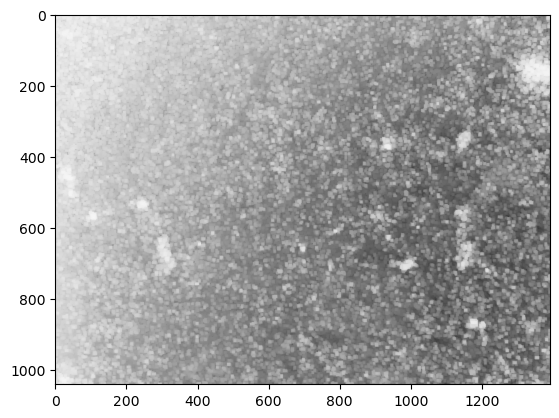

In [74]:
def morph_open(img, morph_size):
    element = cv.getStructuringElement(cv.MORPH_RECT, (2 * morph_size + 1, 2 * morph_size + 1), (morph_size, morph_size))
    return cv.morphologyEx(img, cv.MORPH_OPEN, element)
opened = morph_open(255 - img, 3)
plt.imshow(opened)

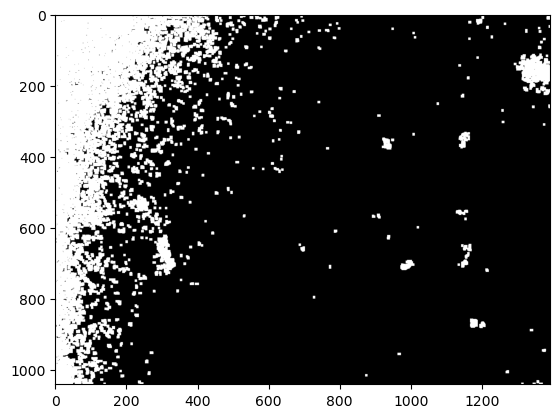

In [35]:
_, thresholded = cv.threshold(opened, 200, 255, cv.THRESH_BINARY)
plt.imshow(thresholded)

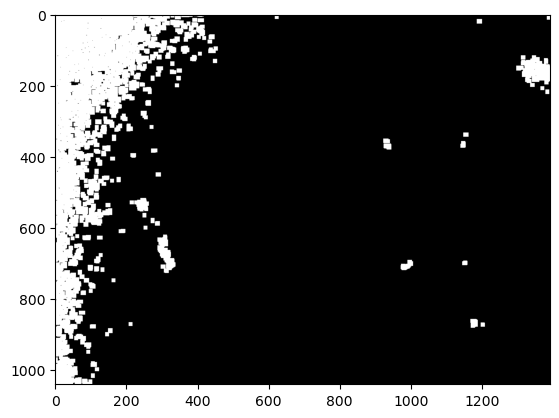

In [36]:
opened2 = morph_open(thresholded, 5)
plt.imshow(opened2)

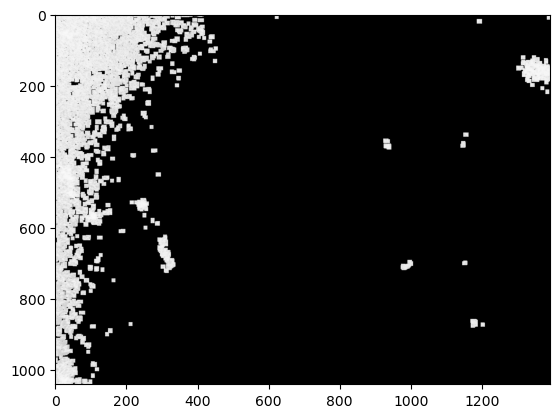

In [37]:
plants = img - img * opened2
plt.imshow(img - plants)

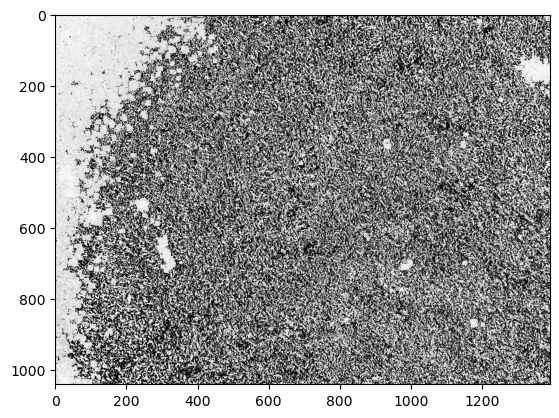

In [38]:
img1 = cv.imread("./data/Well B1_01/2020_02_21_19_03_42_77.tif")
minus_plants = img1 - plants
plt.imshow(minus_plants)

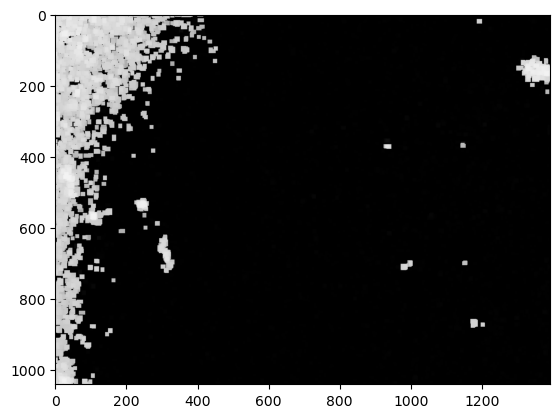

In [40]:
opened3 = morph_open(minus_plants, 5)
plt.imshow(opened3)

In [4]:
from os import listdir
deleted_directories = [20, 21, 23, 24, 25]
for i in range(25):
    index = i + 1
    if index in deleted_directories:
        continue
    if index < 10:
        index = f"0{index}"
    directory = f"Well B1_{index}"
    print(len(listdir(f"./data/{directory}")))

84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84
84


In [42]:
def combine_files():
    rows = []
    for y in range(5):
        rows.append([])
        for x in range(5):
            index = y * 5 + x + 1
            if index in deleted_directories:
                rows[y].append(None)
                continue
            if index < 10:
                index = f"0{index}"
            directory = f"Well B1_{index}"
            rows[y].append(listdir(f"./data/{directory}"))
    count = len(rows[0][0])
    images = [[] for _ in range(count)]
    for y in range(5):
        for x in range(5):
            col = rows[y][x]
            if col is None:
                for i in range(count):
                  images[i].append(None)
                continue
            for i in range(count):
              images[i].append(col[i])
    return images

In [43]:
image_names = combine_files()
print(image_names[0])

['2020_02_21_19_01_45_57.tif', '2020_02_21_19_01_47_43.tif', '2020_02_21_19_01_49_86.tif', '2020_02_21_19_01_52_17.tif', '2020_02_21_19_01_54_02.tif', '2020_02_21_19_02_04_12.tif', '2020_02_21_19_02_01_98.tif', '2020_02_21_19_01_59_95.tif', '2020_02_21_19_01_57_85.tif', '2020_02_21_19_01_55_62.tif', '2020_02_21_19_02_06_04.tif', '2020_02_21_19_02_07_91.tif', '2020_02_21_19_02_10_34.tif', '2020_02_21_19_02_12_73.tif', '2020_02_21_19_02_14_48.tif', '2020_02_21_19_02_24_44.tif', '2020_02_21_19_02_22_48.tif', '2020_02_21_19_02_20_51.tif', '2020_02_21_19_02_18_14.tif', None, None, '2020_02_21_19_02_28_50.tif', None, None, None]


In [25]:
count = len(image_names)
images = [[] for _ in range(count)]
for i in range(count):
    for j in range(25):
        index = j + 1
        if index < 10:
            index = f"0{index}"
        if not image_names[i][j]:
            images[i].append(None)
            continue
        images[i].append(cv.imread(f"./data/Well B1_{index}/{image_names[i][j]}"))

In [49]:
for image_list in images:
    for image in image_list:
        if not image is None:
            print(image.shape)

(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1392, 3)
(1040, 1

In [62]:
max_y = images[0][0].shape[0]
max_x = images[0][0].shape[1]
print(f"{max_y} {max_x}")

1040 1392


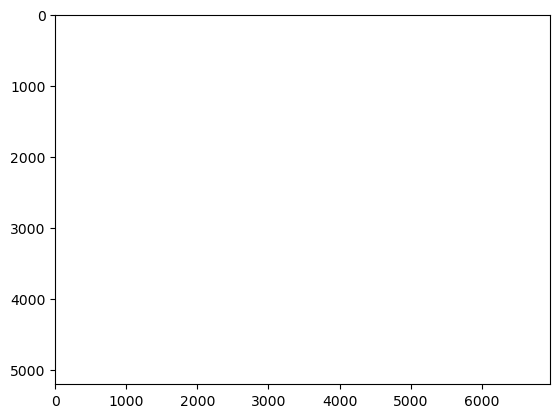

In [68]:
def create_white():
    return np.zeros((max_y * 5, max_x * 5, 3), np.uint8) + 255
plt.imshow(create_white())

In [70]:
final_images = []
for i in range(count):
    white = create_white()
    final_images.append(white)
    for y in range(5):
        for x in range(5):
            index = y * 5 + x
            if images[0][index] is None:
                continue
            white[y * max_y:(y + 1) * max_y, x * max_x:(x + 1) * max_x] = images[i][index][:]

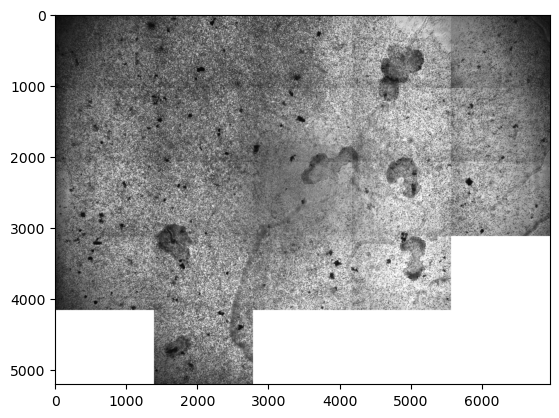

In [71]:
plt.imshow(final_images[0])

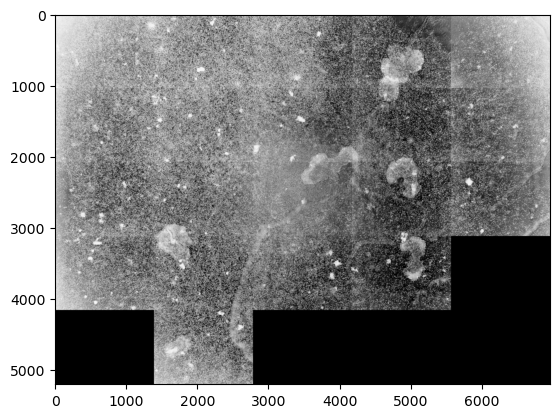

In [72]:
image = final_images[0]
plt.imshow(255 - image)

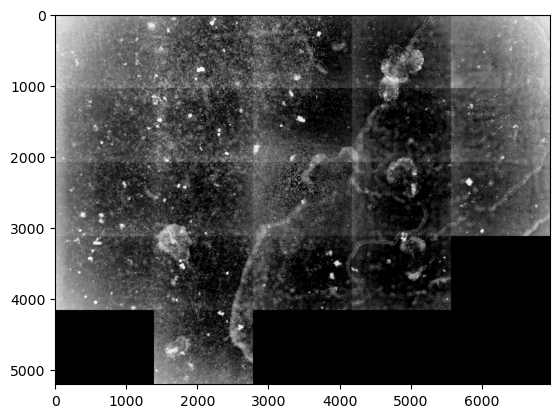

In [81]:
opened = morph_open(255 - image, 5)
plt.imshow(opened)

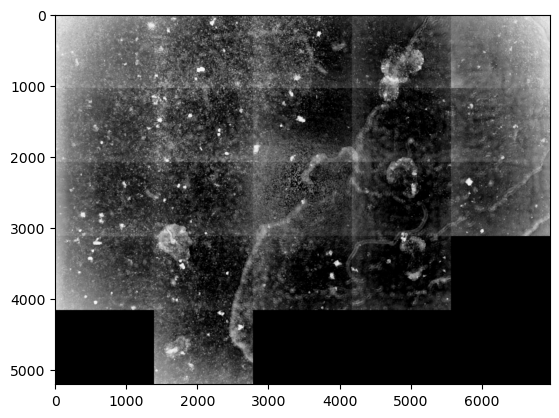

In [83]:
def delete_lines(image):
    for y in range(5):
        image[y * max_y, :] = (image[y * max_y + 1, :] + image[y * max_y - 1, :]) / 2
    for x in range(5):
        image[:, x * max_x] = (image[:, x * max_x + 1] + image[:, x * max_x - 1]) / 2
    return image
deleted = delete_lines(opened)
plt.imshow(deleted)

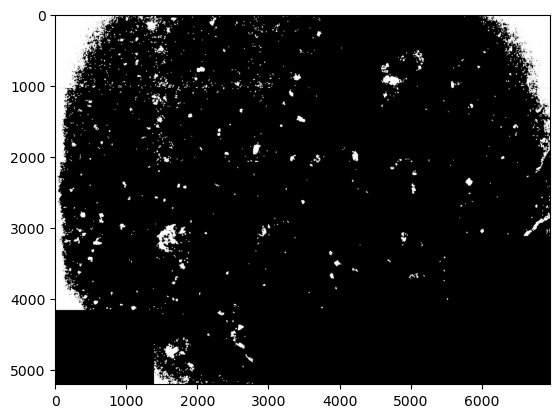

In [85]:
_, thresholded = cv.threshold(opened, 150, 255, cv.THRESH_BINARY)
plt.imshow(thresholded)

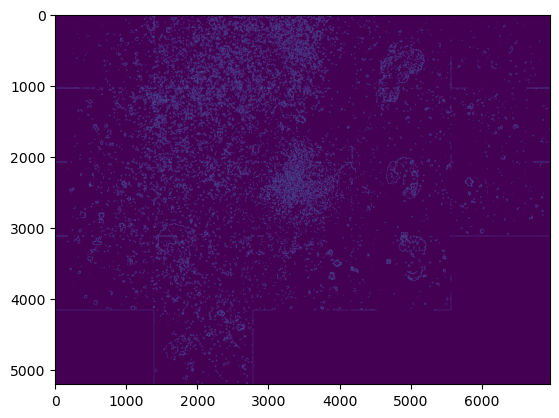

In [87]:
canny = cv.Canny(opened, 100, 255)
plt.imshow(canny)